### CNN

#### Train a CNN on the MNIST data

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### We need to reshape our X and y data
* For X, we need to add a 4th dimension using `np.expand_dims`
* For y, we need to factorize our labels using `to_categorical`

In [3]:
X_train_reshaped = np.expand_dims(X_train, axis=3)
X_test_reshaped = np.expand_dims(X_test, axis=3)
y_train_cats = to_categorical(y_train)
y_test_cats = to_categorical(y_test)

In [4]:
X_train_reshaped.shape

(60000, 28, 28, 1)

#### Now we can build the model
* We can define the number of kernels
* The number of strides
* The activation function to be used

In [5]:
model = Sequential([
    Conv2D(filters=40,             # aka neurons/kernels
           kernel_size=(3,3),      # (3,3) kernel has 9+1 parameters
           strides=(2,2),          # bigger > smaller output [default:(1,1) and use MaxPool aftwerwards]
           activation='relu',      #ReLu great first choice. ELU for optimization
           input_shape=(28,28,1)), #have to specify input shape in first layer <- shape of X
    Conv2D(filters=20, kernel_size=(3,3), strides=(2,2), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 40)        400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 20)          7220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                810       
Total params: 8,430
Trainable params: 8,430
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_reshaped,y_train_cats, epochs=30, batch_size=50, callbacks=[callback], validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 3s 4ms/step - loss: 1.3753 - accuracy: 0.7530 - val_loss: 0.3175 - val_accuracy: 0.9061
Epoch 2/30
960/960 [==============================] - 3s 3ms/step - loss: 0.2666 - accuracy: 0.9199 - val_loss: 0.2252 - val_accuracy: 0.9344
Epoch 3/30
960/960 [==============================] - 3s 3ms/step - loss: 0.1990 - accuracy: 0.9399 - val_loss: 0.2071 - val_accuracy: 0.9386
Epoch 4/30
960/960 [==============================] - 3s 3ms/step - loss: 0.1676 - accuracy: 0.9488 - val_loss: 0.2179 - val_accuracy: 0.9334
Epoch 5/30
960/960 [==============================] - 3s 3ms/step - loss: 0.1456 - accuracy: 0.9554 - val_loss: 0.1470 - val_accuracy: 0.9576
Epoch 6/30
960/960 [==============================] - 3s 3ms/step - loss: 0.1328 - accuracy: 0.9591 - val_loss: 0.1416 - val_accuracy: 0.9597
Epoch 7/30
960/960 [==============================] - 3s 3ms/step - loss: 0.1221 - accuracy: 0.9623 - val_loss: 0.1453 - val_accuracy: 0.9616
Epoch 

In [9]:
model.evaluate(X_test_reshaped, y_test_cats)

313/313 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.9655


[0.12582261860370636, 0.965499997138977]

#### Lets look at what we created

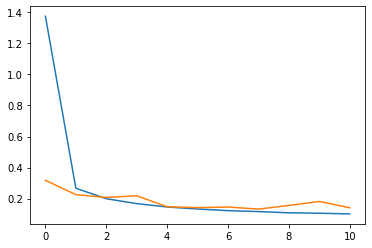

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

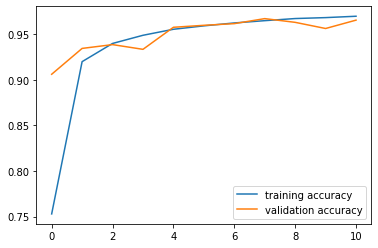

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [12]:
# prediction on new data points
print(model.predict(X_test_reshaped[:10]))

[[6.56529562e-12 1.33487132e-09 3.42333283e-06 1.71011152e-07
  2.56328867e-13 8.32413739e-12 1.52533337e-22 9.99994397e-01
  5.22071808e-09 1.97078384e-06]
 [9.65826985e-06 7.90130485e-08 9.99515772e-01 4.69118255e-08
  7.20827731e-10 4.67527544e-11 1.01255253e-07 1.99067940e-09
  4.73703461e-04 6.56850034e-07]
 [7.43219957e-08 9.99962687e-01 6.14627425e-08 1.62160696e-09
  8.92002959e-07 2.75180267e-10 1.18654748e-08 3.61099192e-05
  5.24532506e-09 1.55970724e-07]
 [9.99998093e-01 9.56999150e-12 6.24954255e-11 2.37083086e-09
  3.84883618e-11 6.05165473e-10 8.88843772e-08 1.72496016e-06
  1.32555471e-07 1.10230269e-10]
 [1.69616626e-10 3.94430844e-09 4.73547694e-11 3.58060478e-15
  1.00000000e+00 4.70028747e-13 2.35219364e-08 2.62693839e-10
  1.82032722e-11 6.63334720e-10]
 [5.63524283e-10 9.98088181e-01 5.87530984e-08 1.41472600e-09
  1.50369135e-06 7.76744294e-12 4.96545915e-08 1.91007357e-03
  4.54430404e-09 4.51154065e-08]
 [2.23117220e-13 1.09037304e-13 6.05119600e-12 3.65463215e